In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [147]:
drivers_data = pd.read_csv('Dataset/penguins_size.csv',sep = ',')
drivers_data.head(10)


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [148]:
drivers_data.describe(include='all')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


In [149]:
from sklearn import preprocessing
drivers_data= drivers_data.dropna()
le = preprocessing.LabelEncoder()
drivers_data['species'] = le.fit_transform(drivers_data['species'].astype(str))
drivers_data['island'] = le.fit_transform(drivers_data['island'].astype(str))
drivers_data['sex'] = le.fit_transform(drivers_data['sex'].astype(str))


drivers_data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,2
1,0,2,39.5,17.4,186.0,3800.0,1
2,0,2,40.3,18.0,195.0,3250.0,1
4,0,2,36.7,19.3,193.0,3450.0,1
5,0,2,39.3,20.6,190.0,3650.0,2


In [150]:
drivers_data.shape

(334, 7)

In [151]:
drivers_data.corr()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
species,1.000000e+00,-0.623595,0.729262,-0.740803,0.851351,0.751020,-1.625802e-17
island,-6.235949e-01,1.000000,-0.337009,0.568885,-0.555759,-0.560518,-4.147089e-03
culmen_length_mm,7.292618e-01,-0.337009,1.000000,-0.228640,0.652126,0.589066,3.386764e-01
culmen_depth_mm,-7.408034e-01,0.568885,-0.228640,1.000000,-0.578730,-0.472987,3.740342e-01
flipper_length_mm,8.513508e-01,-0.555759,0.652126,-0.578730,1.000000,0.873211,2.411210e-01
body_mass_g,7.510201e-01,-0.560518,0.589066,-0.472987,0.873211,1.000000,4.115305e-01
sex,-1.625802e-17,-0.004147,0.338676,0.374034,0.241121,0.411531,1.000000e+00


In [152]:
drivers_data = drivers_data.sample(frac=1)
drivers_data = drivers_data.dropna()
# drivers_data = drivers_data.drop[species,axis=1]
# drivers_data = drivers_data.drop('body_mass_g',axis=1)
drivers_data = drivers_data.drop('sex',axis=1)

drivers_data = drivers_data.drop('species',axis=1)
drivers_data = drivers_data.drop('island',axis=1)
drivers_data = drivers_data.drop('culmen_length_mm',axis=1)
drivers_data = drivers_data.drop('culmen_depth_mm',axis=1)
# drivers_data = drivers_data.drop('flipper_length_mm',axis=1)

In [153]:
drivers_data.head()

,flipper_length_mm,body_mass_g
262,210.0,4300.0
334,217.0,4375.0
234,210.0,4200.0
183,201.0,4300.0
149,193.0,3750.0


In [ ]:
fig,ax = plt.subplots(figsize = (10,8))

plt.scatter(drivers_data['Distance_Feature'],
           drivers_data['Speeding_Feature'],s =300,c='blue')
plt.xlabel('DISTANCE')
plt.ylabel('SPEED')

plt.show()

In [162]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters = 4, max_iter=1000).fit(drivers_data)

In [163]:
kmeans_model.labels_[::40]

array([1, 3, 1, 0, 1, 1, 1, 0, 3], dtype=int32)

In [164]:
np.unique(kmeans_model.labels_)

array([0, 1, 2, 3], dtype=int32)

In [165]:
zipped_list = list(zip(np.array(drivers_data),kmeans_model.labels_))

zipped_list

[(array([ 210., 4300.]), 1),
 (array([ 217., 4375.]), 0),
 (array([ 210., 4200.]), 1),
 (array([ 201., 4300.]), 1),
 (array([ 193., 3750.]), 1),
 (array([ 218., 5700.]), 2),
 (array([ 220., 5550.]), 2),
 (array([ 218., 4950.]), 0),
 (array([ 201., 4050.]), 1),
 (array([ 191., 3275.]), 3),
 (array([ 187., 3475.]), 3),
 (array([ 190., 3900.]), 1),
 (array([ 193., 3800.]), 1),
 (array([ 200., 3400.]), 3),
 (array([ 187., 3300.]), 3),
 (array([ 198., 4400.]), 0),
 (array([ 222., 6000.]), 2),
 (array([ 191., 3900.]), 1),
 (array([ 187., 2900.]), 3),
 (array([ 185., 3700.]), 1),
 (array([ 187., 3800.]), 1),
 (array([ 199., 3325.]), 3),
 (array([ 208., 4350.]), 0),
 (array([ 209., 4600.]), 0),
 (array([ 222., 5550.]), 2),
 (array([ 216., 4700.]), 0),
 (array([ 220., 4700.]), 0),
 (array([ 210., 4550.]), 0),
 (array([ 180., 3550.]), 3),
 (array([ 195., 3900.]), 1),
 (array([ 196., 4400.]), 0),
 (array([ 193., 4200.]), 1),
 (array([ 230., 5700.]), 2),
 (array([ 190., 3900.]), 1),
 (array([ 198.

In [166]:
 centroids = kmeans_model.cluster_centers_

In [167]:
centroids

array([[ 209.57692308, 4708.65384615],
       [ 195.14150943, 3936.32075472],
       [ 221.70909091, 5548.18181818],
       [ 188.55789474, 3327.89473684]])

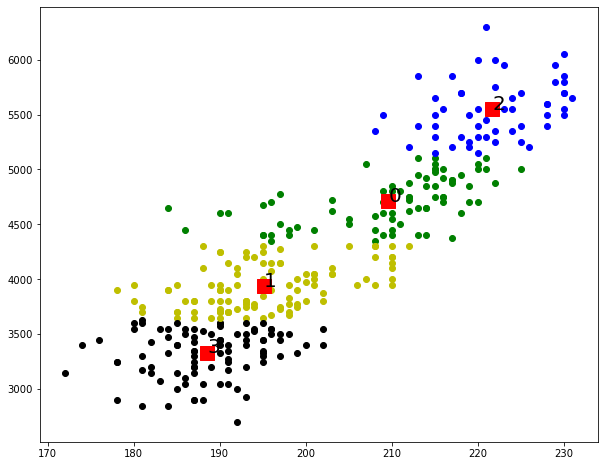

In [168]:
colours = ['g','y','b','k']

plt.figure(figsize=(10,8))

for element in zipped_list:
    plt.scatter(element[0][0],element[0][1], c= colours[(element[1] %len(colours))])
    
plt.scatter(centroids[:,0], centroids[:,1], c = 'r',s=200,marker='s')

for i in range(len(centroids)):
    plt.annotate(i,(centroids[i][0],centroids[i][1]),fontsize=20)

In [169]:
from sklearn.metrics import silhouette_score

print(silhouette_score(drivers_data,kmeans_model.labels_))

0.5538450174168057
